# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [3]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [4]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [5]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [6]:
df=pd.read_csv("AMZN.csv")

In [7]:
#read_csv function from pandas

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-17,88.773499,92.889000,84.461998,90.391998,90.391998,218342000
1,2020-03-18,87.500000,92.083000,87.250000,91.500000,91.500000,192904000
2,2020-03-19,93.000000,97.250000,91.632500,94.046501,94.046501,207998000
3,2020-03-20,96.315498,97.849998,91.036499,92.304497,92.304497,196358000
4,2020-03-23,91.387497,95.970001,90.599998,95.141502,95.141502,156170000
...,...,...,...,...,...,...,...
247,2021-03-10,154.922501,155.822998,151.502502,152.882004,152.882004,60250000
248,2021-03-11,155.200500,156.589005,154.146500,155.679504,155.679504,55528000
249,2021-03-12,153.750000,154.949005,152.274994,154.474503,154.474503,48438000
250,2021-03-15,153.728500,154.112000,151.604507,154.084000,154.084000,58272000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,146.636385,148.516230,144.515526,146.545488,146.545488,9.343610e+07
std,21.394759,21.336638,21.014379,21.036693,21.036693,3.496016e+07
min,87.500000,92.083000,84.461998,90.391998,90.391998,2.903800e+07
25%,131.937500,132.923996,130.684754,131.727623,131.727623,6.659350e+07
50%,156.125504,157.889999,154.284752,155.694999,155.694999,8.566900e+07
75%,160.450871,162.355881,158.278626,160.265873,160.265873,1.118900e+08
max,177.350006,177.612503,174.334503,176.572495,176.572495,2.407640e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [11]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [12]:
px.area(df,x="Date", y="Close")

In [13]:
px.line(df, x="Date", y="Close")

In [14]:
px.area(df, x="Date", y="Volume")

In [15]:
px.bar(df, y="Volume")

In [16]:
px.box(df, y="Close")

# Understanding Facebook Prophet

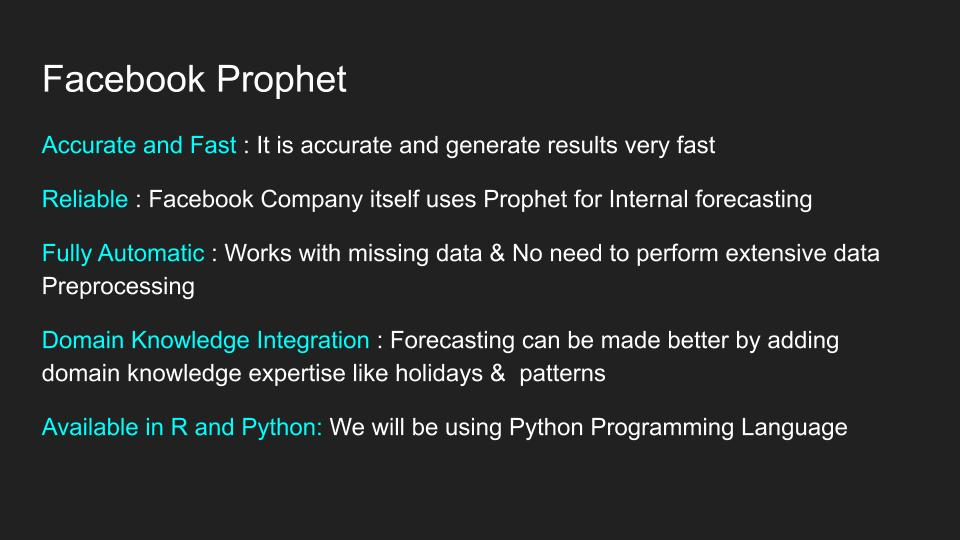

## Data Preperation

In [17]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-17,88.773499,92.889000,84.461998,90.391998,90.391998,218342000
1,2020-03-18,87.500000,92.083000,87.250000,91.500000,91.500000,192904000
2,2020-03-19,93.000000,97.250000,91.632500,94.046501,94.046501,207998000
3,2020-03-20,96.315498,97.849998,91.036499,92.304497,92.304497,196358000
4,2020-03-23,91.387497,95.970001,90.599998,95.141502,95.141502,156170000
...,...,...,...,...,...,...,...
247,2021-03-10,154.922501,155.822998,151.502502,152.882004,152.882004,60250000
248,2021-03-11,155.200500,156.589005,154.146500,155.679504,155.679504,55528000
249,2021-03-12,153.750000,154.949005,152.274994,154.474503,154.474503,48438000
250,2021-03-15,153.728500,154.112000,151.604507,154.084000,154.084000,58272000


In [18]:
columns=["Date","Close"]
ndf  = pd.DataFrame(df, columns = columns)

In [19]:
ndf

,Date,Close
0,2020-03-17,90.391998
1,2020-03-18,91.500000
2,2020-03-19,94.046501
3,2020-03-20,92.304497
4,2020-03-23,95.141502
...,...,...
247,2021-03-10,152.882004
248,2021-03-11,155.679504
249,2021-03-12,154.474503
250,2021-03-15,154.084000


In [20]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [21]:
prophet_df

,ds,y
0,2020-03-17,90.391998
1,2020-03-18,91.500000
2,2020-03-19,94.046501
3,2020-03-20,92.304497
4,2020-03-23,95.141502
...,...,...
247,2021-03-10,152.882004
248,2021-03-11,155.679504
249,2021-03-12,154.474503
250,2021-03-15,154.084000


## Creating Facebook Prophet Model

In [22]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_3i1x2i/68krazh9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_3i1x2i/yio983t8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22867', 'data', 'file=/tmp/tmpg_3i1x2i/68krazh9.json', 'init=/tmp/tmpg_3i1x2i/yio983t8.json', 'output', 'file=/tmp/tmpg_3i1x2i/prophet_modelo5rih24n/prophet_model-20250110191023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [23]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-17,93.444636,87.399278,100.881289,93.444636,93.444636,0.744244,0.744244,0.744244,0.744244,0.744244,0.744244,0.0,0.0,0.0,94.188880
1,2020-03-18,93.901067,88.472856,101.806768,93.901067,93.901067,1.046227,1.046227,1.046227,1.046227,1.046227,1.046227,0.0,0.0,0.0,94.947293
2,2020-03-19,94.357497,88.476377,102.114882,94.357497,94.357497,0.926039,0.926039,0.926039,0.926039,0.926039,0.926039,0.0,0.0,0.0,95.283536
3,2020-03-20,94.813927,87.815546,101.713518,94.813927,94.813927,0.024315,0.024315,0.024315,0.024315,0.024315,0.024315,0.0,0.0,0.0,94.838242
4,2020-03-23,96.183218,90.098626,103.843861,96.183218,96.183218,0.460293,0.460293,0.460293,0.460293,0.460293,0.460293,0.0,0.0,0.0,96.643510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2021-04-11,157.387237,149.210391,162.231586,156.762771,157.978205,-1.600559,-1.600559,-1.600559,-1.600559,-1.600559,-1.600559,0.0,0.0,0.0,155.786677
278,2021-04-12,157.374038,150.781334,164.350243,156.722169,158.015385,0.460293,0.460293,0.460293,0.460293,0.460293,0.460293,0.0,0.0,0.0,157.834331
279,2021-04-13,157.360839,151.112722,164.749583,156.677196,158.050028,0.744244,0.744244,0.744244,0.744244,0.744244,0.744244,0.0,0.0,0.0,158.105083
280,2021-04-14,157.347641,151.403203,165.189879,156.627579,158.091402,1.046227,1.046227,1.046227,1.046227,1.046227,1.046227,0.0,0.0,0.0,158.393868


In [25]:
px.line(forecast, x='ds', y='yhat')

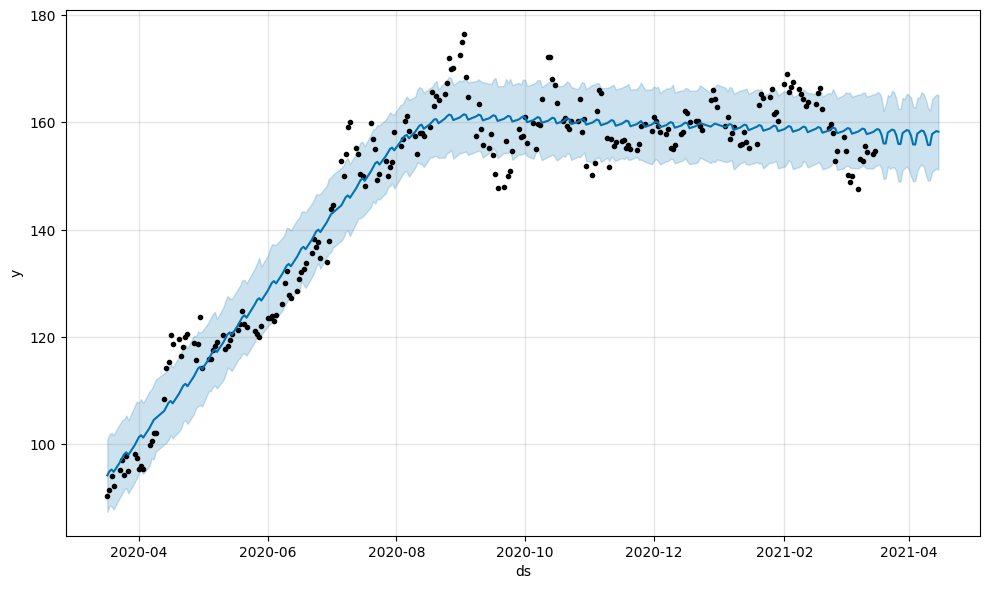

In [26]:
figure = m.plot(forecast, xlabel = 'ds', ylabel='y')

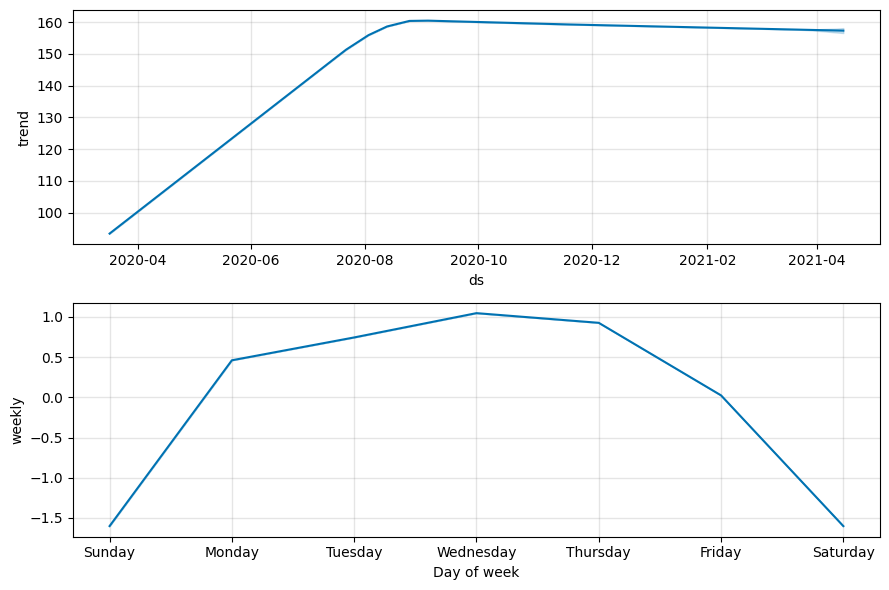

In [27]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [29]:
from google.colab import files
forecast.to_csv('forecast_amzn.csv')
files.download('forecast_amzn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>